In [1]:
import numpy as np
import csv
import random
import networkx as nx
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=270, precision=4)

In [2]:
# paste your csv data here to replace the existing one

sprawdzian = """
0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1
0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
0,0,0,0,0,0,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0
0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

"""

impreza = """
0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1
0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
0,0,0,0,0,0,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0
0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"""

po_szkole = """
0,2,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1
0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0
0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1
0,0,0,0,0,0,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
0,0,0,0,0,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0
0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
0,0,0,0,0,2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"""

csv_data = po_szkole

In [3]:
csv_data = csv_data.strip("\n")

data = np.array(list(csv.reader(csv_data.split("\n"))), dtype=int)

N = data.shape[0]

In [4]:
# 0 - girl
# 1 - boy
gender = [1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1]

In [5]:
A = data
G = nx.DiGraph(A)

In [6]:
edge_weights = []
edge_colors = []
line_widths = []

# gender colors (orange and green)
gc = ["#EC8C0E", "#20970B"]
node_colors =[gc[gender[i]] for i in range(A.shape[0])]

# 0 - 0
# 1 - 3
# 2 - 2
# 3 - 1

for i, j in G.edges:
    a = (4 - A[i, j]) % 4
    line_widths.append(a * 0.5)
    edge_colors.append(gc[gender[i]])
    
node_labels = dict([(i, i+1) for i in range(A.shape[0])])

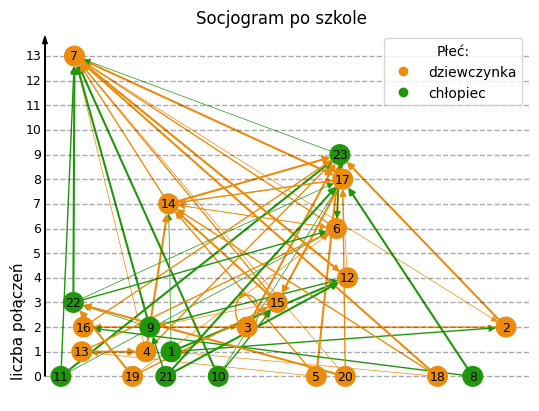

In [7]:
connections = [0] * len(G.nodes)
for i, row in enumerate(A):
    for j, col in enumerate(row):
        if col > 0:
            connections[j] += 1

cmax = max(connections)

pos2 = dict()
# group nodes on the same level
zipped = list(zip(G.nodes, connections))
random.seed(a=2137)
for level in range(cmax + 1):
    nodes = list(filter(lambda x: x[1] == level, zipped))
    if len(nodes) == 0:
        continue
    min_dist = 1
    x = random.random() * cmax * 1.5
    taken = np.array([x])
    pos2[nodes[0][0]] = (x, level)
    count = 1
    while count < len(nodes):
        dist = 0
        while dist < min_dist:
            x = random.random() * cmax * 1.5
            dist = np.min(np.abs(taken - x))
        taken = np.append(taken, [x])
        pos2[nodes[count][0]] = (x, level)
        count += 1

xmax = np.max(np.array([*pos2.values()])[:, 0])


levels = list(range(cmax + 1))
plt.hlines(levels, -0.5, xmax+1, color='#00000055', linestyle='dashed', linewidth=1) 
plt.arrow(-0.5, 0, 0, cmax+0.5, hatch='O', capstyle='butt', linewidth=1, head_width=0.2, color='black')
for i in levels:
    plt.text(-0.65, i, i, fontsize=9, horizontalalignment='right', verticalalignment='center')
plt.text(-2, 0, "liczba połączeń", rotation='vertical', fontsize=11)

nx.draw(G, pos2, node_size=200, font_size=9, edge_color=edge_colors, width=line_widths, labels=node_labels, node_color=node_colors)

# legend hack
plt.plot(-10, 0, marker='o', linewidth=0, color=gc[0], label='dziewczynka')
plt.plot(-10, 0, marker='o', linewidth=0, color=gc[1], label='chłopiec')
plt.axis([-1, xmax+1, -1, cmax+1])
plt.legend(title='Płeć:')
plt.title('Socjogram po szkole')

plt.show()